In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
data = pd.read_csv('CustomerData.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                60 non-null     int64  
 1   name                       60 non-null     object 
 2   gender                     50 non-null     object 
 3   age                        55 non-null     float64
 4   annual income (lakhs)      52 non-null     float64
 5   spending score             60 non-null     int64  
 6   items purchased (monthly)  60 non-null     int64  
 7   country                    60 non-null     object 
 8   category                   47 non-null     object 
 9   purchase type              60 non-null     object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.8+ KB


In [4]:
data.head()

,customer_id,name,gender,age,annual income (lakhs),spending score,items purchased (monthly),country,category,purchase type
0,1,Edith,Female,NaN,40.9,27,62,Iran,Baby,offline
1,2,Sinclair,Male,53.0,NaN,42,47,China,NaN,online
2,3,Enoch,Male,22.0,NaN,70,26,China,Computers,offline
3,4,Lorenzo,Male,9.0,18.5,68,80,Russia,NaN,online
4,5,Damian,Male,55.0,18.4,69,89,Philippines,Jewelery,offline


In [5]:
data.tail()

,customer_id,name,gender,age,annual income (lakhs),spending score,items purchased (monthly),country,category,purchase type
55,56,Annamarie,NaN,36.0,42.3,54,55,Poland,Beauty,offline
56,57,Bari,Female,22.0,33.5,36,4,Ukraine,Movies,offline
57,58,Hersch,Male,0.0,57.2,77,58,Chile,Electronics,offline
58,59,Brocky,Male,NaN,17.3,34,34,China,NaN,online
59,60,Erna,Female,56.0,16.0,44,12,France,Beauty,offline


In [6]:
data.describe()

,customer_id,age,annual income (lakhs),spending score,items purchased (monthly)
count,60.000000,55.000000,52.000000,60.000000,60.000000
mean,30.500000,29.945455,35.578846,46.016667,51.333333
std,17.464249,18.669066,14.654964,26.076479,30.628815
min,1.000000,0.000000,11.200000,2.000000,1.000000
25%,15.750000,15.000000,22.225000,27.000000,25.750000
50%,30.500000,31.000000,35.150000,43.500000,57.000000
75%,45.250000,46.000000,50.325000,68.250000,75.250000
max,60.000000,59.000000,60.000000,100.000000,100.000000


In [7]:
data.isna().sum()


customer_id                   0
name                          0
gender                       10
age                           5
annual income (lakhs)         8
spending score                0
items purchased (monthly)     0
country                       0
category                     13
purchase type                 0
dtype: int64

In [8]:
data['gender'].fillna(data.gender.mode()[0],inplace=True)
data['category'].fillna(data.category.mode()[0],inplace=True)

In [9]:
data.fillna(data.mean(),inplace=True)

In [10]:
data.isna().sum()

customer_id                  0
name                         0
gender                       0
age                          0
annual income (lakhs)        0
spending score               0
items purchased (monthly)    0
country                      0
category                     0
purchase type                0
dtype: int64

In [11]:
data['category'].fillna(data.category.mode()[0],inplace=True)

In [12]:
data.isna().sum()

customer_id                  0
name                         0
gender                       0
age                          0
annual income (lakhs)        0
spending score               0
items purchased (monthly)    0
country                      0
category                     0
purchase type                0
dtype: int64

In [13]:
data.dropna(axis=0,inplace=True)

In [14]:
data.head()

,customer_id,name,gender,age,annual income (lakhs),spending score,items purchased (monthly),country,category,purchase type
0,1,Edith,Female,29.945455,40.900000,27,62,Iran,Baby,offline
1,2,Sinclair,Male,53.000000,35.578846,42,47,China,Beauty,online
2,3,Enoch,Male,22.000000,35.578846,70,26,China,Computers,offline
3,4,Lorenzo,Male,9.000000,18.500000,68,80,Russia,Beauty,online
4,5,Damian,Male,55.000000,18.400000,69,89,Philippines,Jewelery,offline


In [15]:
data.tail()

,customer_id,name,gender,age,annual income (lakhs),spending score,items purchased (monthly),country,category,purchase type
55,56,Annamarie,Male,36.000000,42.3,54,55,Poland,Beauty,offline
56,57,Bari,Female,22.000000,33.5,36,4,Ukraine,Movies,offline
57,58,Hersch,Male,0.000000,57.2,77,58,Chile,Electronics,offline
58,59,Brocky,Male,29.945455,17.3,34,34,China,Beauty,online
59,60,Erna,Female,56.000000,16.0,44,12,France,Beauty,offline


In [17]:
from sklearn.preprocessing import LabelEncoder
data[['gender','purchase type ','category','country']] = data[['gender','purchase type ','category','country']].apply(LabelEncoder().fit_transform)
data.head()

,customer_id,name,gender,age,annual income (lakhs),spending score,items purchased (monthly),country,category,purchase type
0,1,Edith,0,29.945455,40.900000,27,62,7,1,0
1,2,Sinclair,1,53.000000,35.578846,42,47,2,2,1
2,3,Enoch,1,22.000000,35.578846,70,26,2,5,0
3,4,Lorenzo,1,9.000000,18.500000,68,80,16,2,1
4,5,Damian,1,55.000000,18.400000,69,89,12,12,0


In [18]:
data['age'] = pd.cut(x = data['age'],labels=('child','adult','sc'), bins=(0,18,65,100), include_lowest=True)

In [19]:
data.head()

,customer_id,name,gender,age,annual income (lakhs),spending score,items purchased (monthly),country,category,purchase type
0,1,Edith,0,adult,40.900000,27,62,7,1,0
1,2,Sinclair,1,adult,35.578846,42,47,2,2,1
2,3,Enoch,1,adult,35.578846,70,26,2,5,0
3,4,Lorenzo,1,child,18.500000,68,80,16,2,1
4,5,Damian,1,adult,18.400000,69,89,12,12,0


<AxesSubplot:xlabel='spending score', ylabel='Count'>

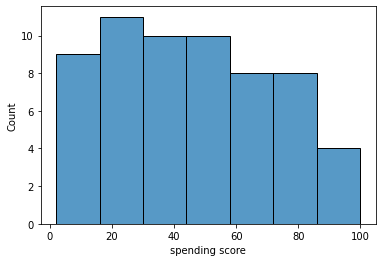

In [20]:
sns.histplot(data=data, x='spending score')

<AxesSubplot:xlabel='items purchased (monthly)'>

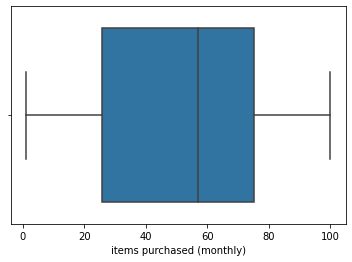

In [21]:
sns.boxplot(data=data, x='items purchased (monthly)')

<AxesSubplot:xlabel='annual income (lakhs)', ylabel='items purchased (monthly)'>

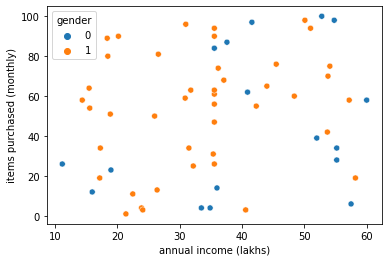

In [22]:
sns.scatterplot(data=data, x='annual income (lakhs)',y='items purchased (monthly)', hue='gender')

<AxesSubplot:xlabel='age', ylabel='items purchased (monthly)'>

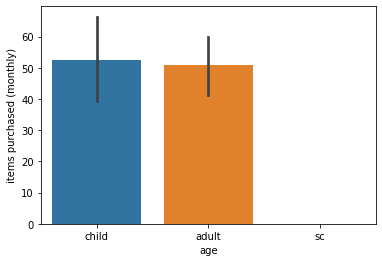

In [23]:
sns.barplot(data=data, x='age', y='items purchased (monthly)')

In [24]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
data[['annual income (lakhs)', 'spending score']] = scaler.fit_transform(data[['annual income (lakhs)', 'spending score']])

In [25]:
data.head()

,customer_id,name,gender,age,annual income (lakhs),spending score,items purchased (monthly),country,category,purchase type
0,1,Edith,0,adult,0.608607,0.255102,62,7,1,0
1,2,Sinclair,1,adult,0.499567,0.408163,47,2,2,1
2,3,Enoch,1,adult,0.499567,0.693878,26,2,5,0
3,4,Lorenzo,1,child,0.149590,0.673469,80,16,2,1
4,5,Damian,1,adult,0.147541,0.683673,89,12,12,0


In [26]:
data.drop(columns=('customer_id'),axis=1,inplace=True)

In [27]:
data.head()

,name,gender,age,annual income (lakhs),spending score,items purchased (monthly),country,category,purchase type
0,Edith,0,adult,0.608607,0.255102,62,7,1,0
1,Sinclair,1,adult,0.499567,0.408163,47,2,2,1
2,Enoch,1,adult,0.499567,0.693878,26,2,5,0
3,Lorenzo,1,child,0.149590,0.673469,80,16,2,1
4,Damian,1,adult,0.147541,0.683673,89,12,12,0


In [28]:
transaction_data = pd.read_csv('association_analysis.csv')

In [29]:
transaction_data.drop(columns=['tid'],axis=1,inplace=True)

In [30]:
transaction_data.head()

,onion,tomato,potato,bottleguard,beans
0,1,0,1,0,0
1,1,0,0,1,1
2,0,0,1,0,0
3,0,1,1,1,1
4,1,1,1,0,0


In [31]:
records = []
for i in range(len(transaction_data)):
    record = []
    for j in range(len(transaction_data.columns)):
        if transaction_data.values[i,j]:
            record.append(transaction_data.columns[j])
    records.append(record)

In [32]:
records

[['onion', 'potato'],
 ['onion', 'bottleguard', 'beans'],
 ['potato'],
 ['tomato', 'potato', 'bottleguard', 'beans'],
 ['onion', 'tomato', 'potato'],
 ['tomato', 'bottleguard', 'beans'],
 ['tomato'],
 ['onion', 'potato'],
 ['tomato', 'potato', 'beans'],
 ['tomato'],
 ['onion', 'tomato'],
 ['onion', 'tomato'],
 ['onion', 'beans'],
 ['tomato', 'bottleguard', 'beans'],
 ['onion', 'potato', 'bottleguard'],
 ['tomato', 'bottleguard', 'beans'],
 ['bottleguard'],
 ['tomato', 'bottleguard', 'beans'],
 ['onion', 'beans'],
 ['onion', 'tomato', 'beans'],
 ['onion', 'tomato', 'potato', 'bottleguard'],
 ['onion', 'tomato', 'potato', 'beans'],
 ['potato', 'bottleguard'],
 ['onion'],
 ['onion', 'tomato', 'potato', 'bottleguard', 'beans'],
 ['onion', 'tomato'],
 ['tomato', 'potato', 'bottleguard', 'beans'],
 ['onion', 'bottleguard'],
 ['onion', 'potato', 'bottleguard', 'beans'],
 ['tomato', 'beans'],
 ['onion', 'tomato', 'potato', 'bottleguard', 'beans'],
 ['potato'],
 ['tomato', 'potato'],
 ['potato'

In [33]:
!pip install apyori

You should consider upgrading via the 'c:\users\nimish bongale\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [34]:
from apyori import apriori
rules = apriori(records, min_support = 0.03, min_confidence = 0.7)

In [35]:
rules = list(rules)

In [36]:
for rule in rules:
    print("Rule : ", rule[0], "Support :", rule[1], "Confidence : ", rule[2][0][2])

Rule :  frozenset({'beans', 'bottleguard', 'tomato'}) Support : 0.19607843137254902 Confidence :  0.7692307692307693
Rule :  frozenset({'beans', 'potato', 'tomato'}) Support : 0.1568627450980392 Confidence :  0.7272727272727272
Rule :  frozenset({'beans', 'potato', 'bottleguard', 'tomato'}) Support : 0.09803921568627451 Confidence :  0.8333333333333334
Rule :  frozenset({'beans', 'potato', 'tomato', 'onion'}) Support : 0.09803921568627451 Confidence :  0.7142857142857142
Rule :  frozenset({'tomato', 'potato', 'bottleguard', 'onion'}) Support : 0.09803921568627451 Confidence :  0.7142857142857142
Rule :  frozenset({'potato', 'beans', 'bottleguard', 'tomato', 'onion'}) Support : 0.058823529411764705 Confidence :  0.75


In [37]:
!pip install pyfpgrowth

You should consider upgrading via the 'c:\users\nimish bongale\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [38]:
import pyfpgrowth
itemsets = pyfpgrowth.find_frequent_patterns(records, 0.03)

In [39]:
itemsets

{('beans', 'bottleguard', 'onion'): 6,
 ('beans', 'bottleguard', 'onion', 'potato'): 4,
 ('bottleguard', 'onion', 'tomato'): 6,
 ('bottleguard', 'onion', 'potato', 'tomato'): 5,
 ('beans', 'bottleguard', 'onion', 'tomato'): 3,
 ('beans', 'bottleguard', 'onion', 'potato', 'tomato'): 3,
 ('bottleguard', 'onion', 'potato'): 7,
 ('beans', 'bottleguard', 'potato'): 6,
 ('beans', 'bottleguard', 'potato', 'tomato'): 5,
 ('bottleguard', 'potato', 'tomato'): 8,
 ('beans', 'bottleguard'): 13,
 ('beans', 'bottleguard', 'tomato'): 10,
 ('bottleguard', 'tomato'): 14,
 ('beans', 'onion', 'potato'): 7,
 ('beans', 'onion', 'potato', 'tomato'): 5,
 ('beans', 'potato', 'tomato'): 8,
 ('beans', 'onion'): 13,
 ('beans', 'onion', 'tomato'): 7,
 ('beans', 'tomato'): 16,
 ('onion',): 26,
 ('onion', 'tomato'): 15,
 ('onion', 'potato'): 14,
 ('onion', 'potato', 'tomato'): 9,
 ('potato', 'tomato'): 15,
 ('tomato',): 29}

In [40]:
pyfpgrowth.generate_association_rules(itemsets, 0.7)

{('bottleguard', 'onion', 'potato'): (('tomato',), 0.7142857142857143),
 ('bottleguard', 'onion', 'tomato'): (('potato',), 0.8333333333333334),
 ('beans', 'bottleguard', 'onion', 'potato'): (('tomato',), 0.75),
 ('beans', 'bottleguard', 'onion', 'tomato'): (('potato',), 1.0),
 ('beans', 'bottleguard', 'potato'): (('tomato',), 0.8333333333333334),
 ('beans', 'bottleguard'): (('tomato',), 0.7692307692307693),
 ('bottleguard', 'tomato'): (('beans',), 0.7142857142857143),
 ('beans', 'onion', 'potato'): (('tomato',), 0.7142857142857143),
 ('beans', 'onion', 'tomato'): (('potato',), 0.7142857142857143)}

In [41]:
from sklearn.model_selection import train_test_split
features = data[['gender','annual income (lakhs)']]
target = data['purchase type ']
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=0, test_size = 0.3)

In [42]:
from sklearn.tree import DecisionTreeClassifier

model =  DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
model.score(x_test, y_test)

0.5

In [43]:
from sklearn import metrics
metrics.confusion_matrix(y_test, pred)

array([[2, 7],
       [2, 7]], dtype=int64)

In [44]:
metrics.classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.50      0.22      0.31         9\n           1       0.50      0.78      0.61         9\n\n    accuracy                           0.50        18\n   macro avg       0.50      0.50      0.46        18\nweighted avg       0.50      0.50      0.46        18\n'

In [45]:
roc = metrics.roc_curve(y_test,pred)

<AxesSubplot:>

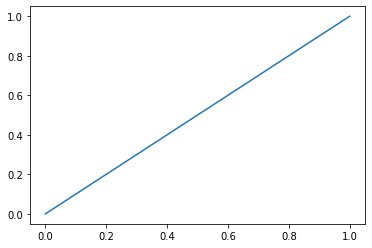

In [46]:
sns.lineplot(x=roc[0],y=roc[1])

In [47]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
bag.fit(x_train,y_train)
pred = bag.predict(x_test)

In [48]:
metrics.confusion_matrix(y_test,pred)

array([[3, 6],
       [2, 7]], dtype=int64)

In [49]:
metrics.classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.60      0.33      0.43         9\n           1       0.54      0.78      0.64         9\n\n    accuracy                           0.56        18\n   macro avg       0.57      0.56      0.53        18\nweighted avg       0.57      0.56      0.53        18\n'

<AxesSubplot:>

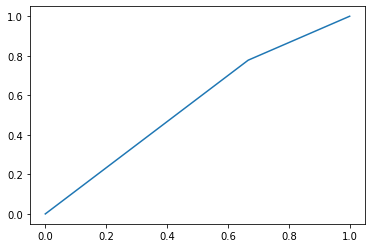

In [50]:
roc = metrics.roc_curve(y_test,pred)
sns.lineplot(x=roc[0], y=roc[1])

In [51]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier()
boost.fit(x_train, y_train)
pred = boost.predict(x_test)

In [52]:
metrics.confusion_matrix(pred,y_test)

array([[2, 2],
       [7, 7]], dtype=int64)

In [53]:
metrics.classification_report(pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.22      0.50      0.31         4\n           1       0.78      0.50      0.61        14\n\n    accuracy                           0.50        18\n   macro avg       0.50      0.50      0.46        18\nweighted avg       0.65      0.50      0.54        18\n'

<AxesSubplot:>

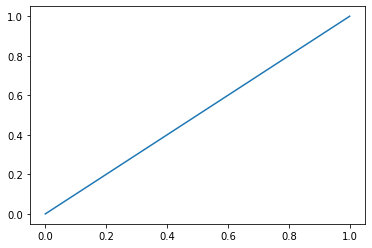

In [54]:
roc = metrics.roc_curve(pred,y_test)
sns.lineplot(x=roc[0],y=roc[1])

In [55]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x_train, y_train)
pred = kmeans.predict(x_test)

In [56]:
metrics.confusion_matrix(pred,y_test)

array([[7, 6],
       [2, 3]], dtype=int64)

In [57]:
metrics.classification_report(pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.78      0.54      0.64        13\n           1       0.33      0.60      0.43         5\n\n    accuracy                           0.56        18\n   macro avg       0.56      0.57      0.53        18\nweighted avg       0.65      0.56      0.58        18\n'

<AxesSubplot:>

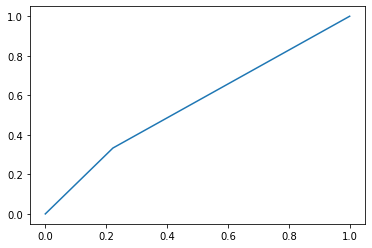

In [58]:
roc = metrics.roc_curve(y_test,pred)
sns.lineplot(x=roc[0],y=roc[1])

In [59]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import numpy as np


In [60]:
df = pd.read_csv('CustomerData.csv')

In [61]:
df.fillna(df.mean(),inplace=True)

In [62]:
df["gender"].fillna(df["gender"].mode()[0],inplace=True)
df["category"].fillna(df["category"].mode()[0],inplace=True)
df.isnull().sum()

customer_id                  0
name                         0
gender                       0
age                          0
annual income (lakhs)        0
spending score               0
items purchased (monthly)    0
country                      0
category                     0
purchase type                0
dtype: int64

In [63]:
df[['gender','purchase type ','category']] = df[['gender','purchase type ','category']].apply(LabelEncoder().fit_transform)
df.head()

,customer_id,name,gender,age,annual income (lakhs),spending score,items purchased (monthly),country,category,purchase type
0,1,Edith,0,29.945455,40.900000,27,62,Iran,1,0
1,2,Sinclair,1,53.000000,35.578846,42,47,China,2,1
2,3,Enoch,1,22.000000,35.578846,70,26,China,5,0
3,4,Lorenzo,1,9.000000,18.500000,68,80,Russia,2,1
4,5,Damian,1,55.000000,18.400000,69,89,Philippines,12,0


In [64]:
from sklearn.cluster import AgglomerativeClustering

agg =  AgglomerativeClustering(n_clusters=5)
clust = agg.fit_predict(data[['gender','category','purchase type ','spending score','items purchased (monthly)','annual income (lakhs)']])

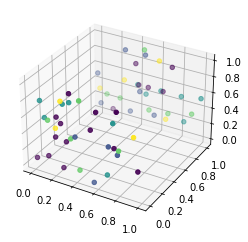

In [65]:
ax = plt.axes(projection='3d')
ax.scatter3D(data['spending score'], data['purchase type '], data['annual income (lakhs)'],c=clust,cmap='viridis')

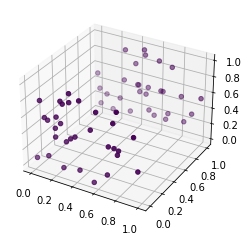

In [67]:
dbscan = DBSCAN(eps=0.1, min_samples=3)
dbs = dbscan.fit_predict(data[['gender','category','purchase type ','spending score','items purchased (monthly)','annual income (lakhs)']])
ax = plt.axes(projection='3d')
ax.scatter3D(data['spending score'], data['purchase type '], data['annual income (lakhs)'],c=dbs,cmap='viridis')